In [1]:
import os 
from PIL import Image
import numpy as np
dir = "NWPU-RESISC45"
lables = os.listdir(dir)
imgs = []
img_lables = []
for i, lable in enumerate(lables):
    print("running ", lable)
    for img_name in os.listdir(f"{dir}/{lable}"):
        img = Image.open(f"{dir}/{lable}/{img_name}")#.convert("L")
        img = img.resize((128,128),Image.Resampling.LANCZOS)
        np_img = np.asanyarray(img)

        imgs.append(np_img)
        img_lables.append(lable)

running  airplane
running  airport
running  baseball_diamond
running  basketball_court
running  beach
running  bridge
running  chaparral
running  church
running  circular_farmland
running  cloud
running  commercial_area
running  dense_residential
running  desert
running  forest
running  freeway
running  golf_course
running  ground_track_field
running  harbor
running  industrial_area
running  intersection
running  island
running  lake
running  meadow
running  medium_residential
running  mobile_home_park
running  mountain
running  overpass
running  palace
running  parking_lot
running  railway
running  railway_station
running  rectangular_farmland
running  river
running  roundabout
running  runway
running  sea_ice
running  ship
running  snowberg
running  sparse_residential
running  stadium
running  storage_tank
running  tennis_court
running  terrace
running  thermal_power_station
running  wetland


In [2]:
imgs_t = np.asanyarray(imgs, np.uint8)
img_lables_t = np.asanyarray(img_lables)
np.save('../numpy_data/imgs_t',imgs_t) 
np.save('../numpy_data/img_lables_t',img_lables_t)

In [3]:
import os 
import numpy as np

dir = "NWPU-RESISC45"
lables = os.listdir(dir)

imgs_t = np.load('../numpy_data/imgs_t.npy')
img_lables_t = np.load('../numpy_data/img_lables_t.npy')
imgs_t.shape


(31500, 128, 128, 3)

In [4]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]
imgs, img_lables = unison_shuffled_copies(imgs_t, img_lables_t)

del imgs_t
del img_lables_t


In [5]:
dataset_usage = 0.4
indx = int(len(imgs)*dataset_usage)
imgs = np.asanyarray(imgs[:indx])
img_lables = np.asanyarray(img_lables[:indx])

airplane


(12600, 128, 128, 3)

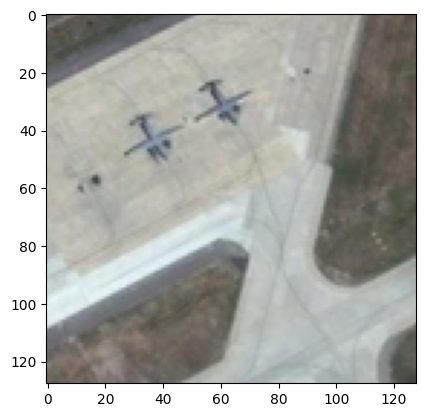

In [6]:
import matplotlib.pyplot as plt
import random
ind = random.randint(0, 100)
plt.imshow(imgs[ind])
print(img_lables[ind])
imgs.shape


In [7]:
test_split = 0.2
split_indx = int(imgs.shape[0]*test_split)

test_img, training_img = imgs[:split_indx,:], imgs[split_indx:,:]
test_img_lables, training_img_lables = img_lables[:split_indx], img_lables[split_indx:]

print(test_img.shape[0], training_img.shape[0])
test_img.shape


2520 10080


(2520, 128, 128, 3)

In [8]:
training_img = training_img.astype('float16') / 255
test_img = test_img.astype('float16') / 255
#test_img = test_img.reshape((test_img.shape[0],512*512))

In [9]:
test_img_lables = [lables.index(i)for i in test_img_lables]
training_img_lables = [lables.index(i)for i in training_img_lables]

In [10]:
from tensorflow.keras.utils import to_categorical

test_img_lables = to_categorical(test_img_lables)
training_img_lables = to_categorical(training_img_lables)

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.applications import VGG19
from keras.layers import Conv2D, MaxPooling2D,Dense,Activation,Dropout,Flatten,BatchNormalization
from keras.layers import Dense,Dropout,Input,MaxPooling2D,MaxPool2D,Conv2D,Flatten
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam,SGD

In [12]:
vgg = VGG19(include_top= False, weights = "imagenet", input_shape=( 128,128, 3))
vgg_layer_list = vgg.layers

model = Sequential ()

for layer in vgg_layer_list:
    model.add(layer)
    
for layer in model.layers:
    layer.trainable = False
    
    
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(45))
model.add(Activation('softmax'))
model.summary()

opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 32, 32, 256)       2

c:\Development\Python\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
history = model.fit(training_img, training_img_lables, epochs=10, validation_split=0.1)
#print(model.evaluate(test_img,test_img_lables))

Epoch 1/10
284/284 [==============================] - 20s 54ms/step - loss: 2.6122 - accuracy: 0.3245 - val_loss: 1.8786 - val_accuracy: 0.4871
Epoch 2/10
284/284 [==============================] - 14s 48ms/step - loss: 1.6904 - accuracy: 0.5392 - val_loss: 1.5396 - val_accuracy: 0.5754
Epoch 3/10
284/284 [==============================] - 14s 48ms/step - loss: 1.3836 - accuracy: 0.6216 - val_loss: 1.4069 - val_accuracy: 0.6081
Epoch 4/10
284/284 [==============================] - 14s 49ms/step - loss: 1.1851 - accuracy: 0.6699 - val_loss: 1.3095 - val_accuracy: 0.6230
Epoch 5/10
284/284 [==============================] - 14s 49ms/step - loss: 1.0436 - accuracy: 0.7143 - val_loss: 1.2793 - val_accuracy: 0.6379
Epoch 6/10
284/284 [==============================] - 14s 49ms/step - loss: 0.9226 - accuracy: 0.7501 - val_loss: 1.2273 - val_accuracy: 0.6468
Epoch 7/10
284/284 [==============================] - 14s 49ms/step - loss: 0.8263 - accuracy: 0.7746 - val_loss: 1.1735 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


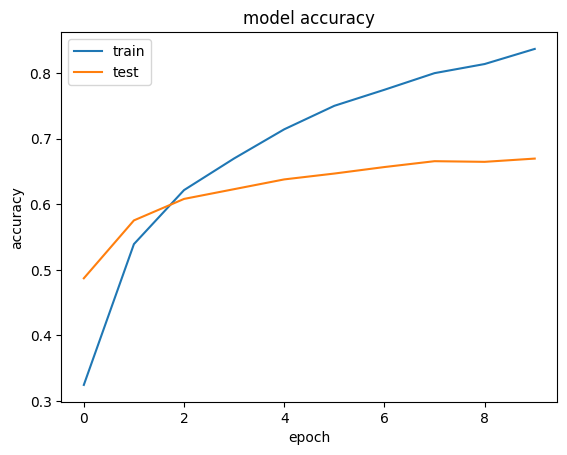

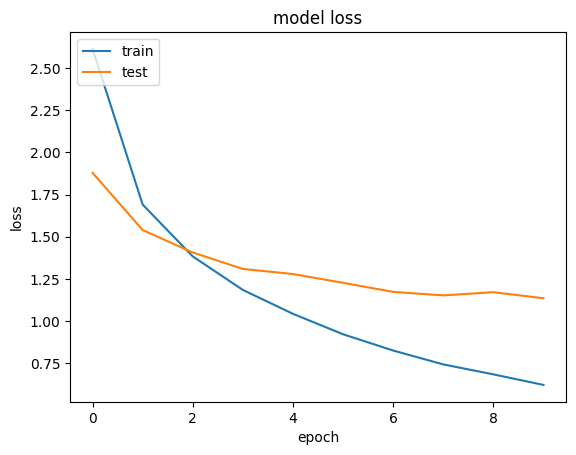

In [18]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 1s 509ms/step
model says:  basketball_court
unser:  basketball_court


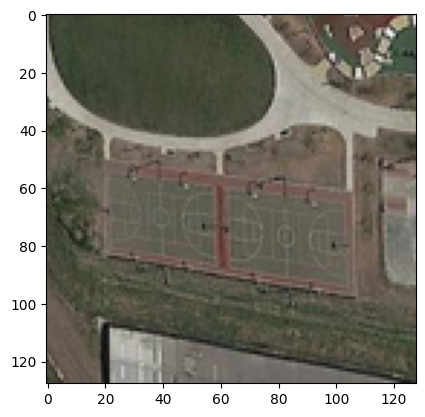

In [15]:
ind = random.randint(0,1000)

img = np.asarray([test_img[ind]])
prediction = model.predict([img])[0]
pred_ind = np.where(prediction == prediction.max())
print("model says: ", lables[pred_ind[0][0]])

text = test_img_lables[ind]
text_ind = np.where(text == 1)
print("unser: ", lables[text_ind[0][0]])

plt.imshow(np.int16(img[0]*255))


In [16]:
path='weights/weights_vgg.h5'
 
# save
# model.save_weights(path)